<a href="https://colab.research.google.com/github/MIARD/AI-CSE422/blob/main/KNN_Logistic_DecisionTree(GlassType).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing necessary libraries and classes
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
#Loading the dataset and inspecting dataset
glass_source=pd.read_csv("/content/glass-source-classification-dataset.csv")
# print(glass_source.head(10))
#analyzing the dimension of the datasets
print("shape: ",glass_source.shape)
#info of the dataset
# print(glass_source.info())
#checking null values
# print(glass_source.isnull().sum())
#Ca column contains null values
#Removing the first irrelevant unnamed column and removing columns with null values
glass_source=glass_source.drop(['Unnamed: 0'], axis = 1)
#evaluating shape after removing a column
# print("shape right now: ",glass_source.shape)
#We can remove the null values
glass_source=glass_source.dropna(axis=0,subset=['Ca'])
# We can input the missing value by strategy mean using SimpleImputer
# impute=SimpleImputer(missing_values=np.nan,strategy='mean')
# impute.fit(glass_source[['Ca']])
# glass_source[['Ca']]=impute.transform(glass_source[['Ca']])
print("shape right now: ",glass_source.shape)
#verifying that there is no null values
print("after removing null rows\n",glass_source.isnull().sum())
# glass_source





shape:  (214, 11)
shape right now:  (208, 10)
after removing null rows
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [5]:
#Encoding of categorical values
from sklearn.preprocessing import LabelEncoder
#printing unique values of categorical features-Ba and Fe
print(glass_source['Ba'].unique())
print(glass_source['Fe'].unique())
print(glass_source['Type'].unique())
encoder=LabelEncoder()
glass_source['Ba']=encoder.fit_transform(glass_source['Ba'])
glass_source['Fe']=encoder.fit_transform(glass_source['Fe'])
glass_source['Type']=encoder.fit_transform(glass_source['Type'])

#verifying the encoded value
print(glass_source[['Ba','Fe','Type']].head())
#displaying the entire dataframe
#print(glass_source.head())
# glass_source



['Does not exist' 'exists']
['Does not exist' 'exists']
['building_window glass' 'vehicle_window glass' 'container glass'
 'tableware glass' 'headlamp glass']
   Ba  Fe  Type
1   0   0     0
2   0   0     0
4   0   0     0
5   0   1     0
6   0   0     0


In [6]:
#Selecting Features and labels
glass_source_features=glass_source.drop(columns=['Type'],axis=1)
glass_source_label=glass_source['Type']
print("Label of the dataset: \n",glass_source_label)
print("Features of the dataset: \n",glass_source_features)

Label of the dataset: 
 1      0
2      0
4      0
5      0
6      0
      ..
208    2
209    2
211    2
212    2
213    2
Name: Type, Length: 208, dtype: int64
Features of the dataset: 
           RI     Na    Mg    Al     Si     K    Ca  Ba  Fe
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83   0   0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78   0   0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07   0   0
5    1.51596  12.79  3.61  1.62  72.97  0.64  8.07   0   1
6    1.51743  13.30  3.60  1.14  73.09  0.58  8.17   0   0
..       ...    ...   ...   ...    ...   ...   ...  ..  ..
208  1.51640  14.37  0.00  2.74  72.85  0.00  9.45   1   0
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18   1   0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44   1   0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48   1   0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62   1   0

[208 rows x 9 columns]


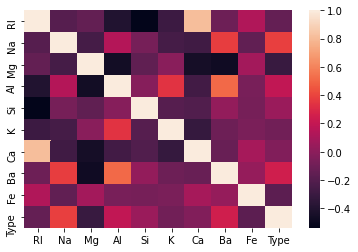

In [7]:
#Data Visualize-heatmap and boxplot of features vs type
import seaborn as sb
co = glass_source.corr()
sb.heatmap(co)
# sb.boxplot(data=glass_source)







In [8]:
#splitting of glass_source dataset using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(glass_source_features,glass_source_label,test_size=0.2, random_state = 0)
# print("xtrain datasets", x_train)
# print("xtest datasets", x_test)
print("shapes : ",x_train.shape,x_test.shape)



shapes :  (166, 9) (42, 9)


In [9]:
#Scaling of features
#MinMax scaler used
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train )
knn_score = knn.score(x_test_scaled, y_test)
print("Test set accuracy: %.2f"%knn_score)

Test set accuracy: 0.76


In [12]:
#Classification and accuracy of datasets is being determined by logisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score,classification_report
model = LogisticRegression()
model.fit(x_train_scaled,y_train)
predictions = model.predict(x_test_scaled)
# print(f"Accuracy score of the model = {round(accuracy_score(y_test,predictions)*100,2)} %\n")
#finding the accuracy
logistic_accuracy=round(accuracy_score(y_test,predictions),2)
print(f'Accuracy of the score is: {round(accuracy_score(y_test,predictions)*100,2)}')





Accuracy of the score is: 80.95


Accuracy score of the model = 76.19 %



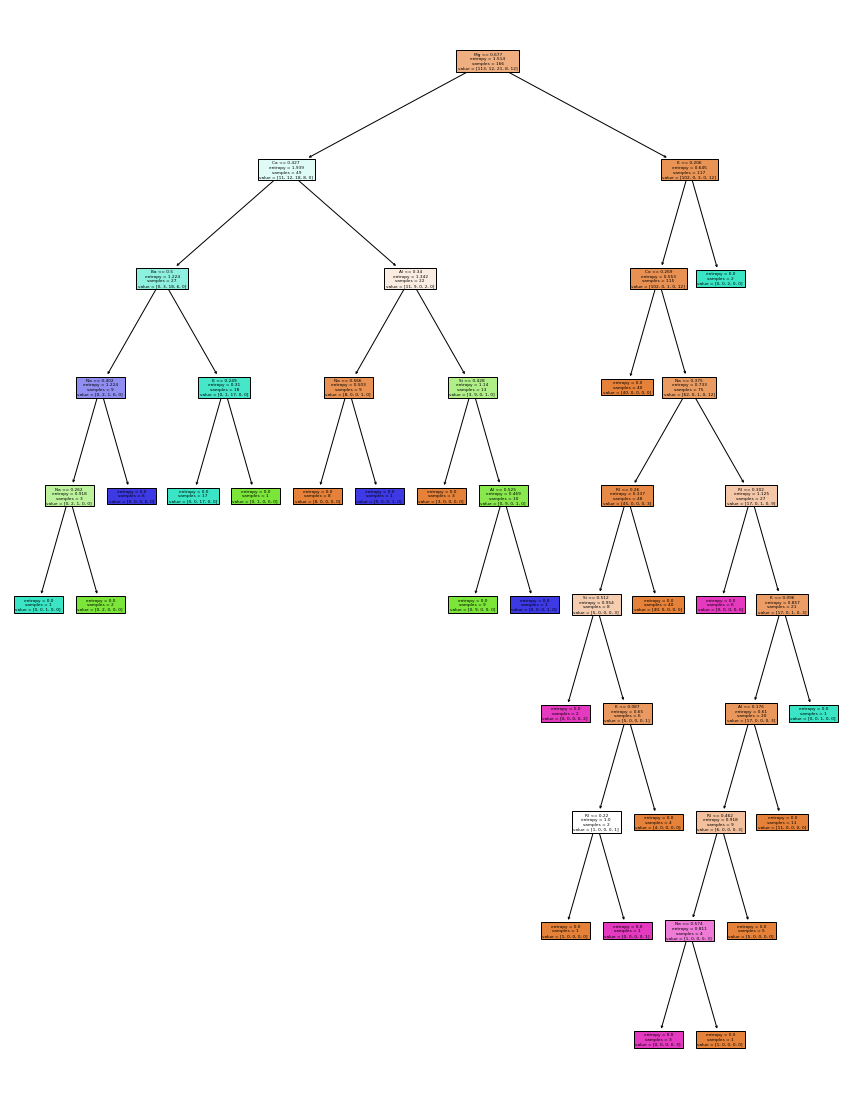

In [13]:
#Performing classification and accuracy using Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
tree_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
tree_model.fit(x_train_scaled,y_train)
predict_output_from_tree = tree_model.predict(x_test_scaled)
decision_accuracy=round(accuracy_score(y_test,predictions),2)
print(f"Accuracy score of the model = {round(accuracy_score(y_test,predict_output_from_tree)*100,2)} %\n")

#showing Decision Tree using entropy
fig, axes = plt.subplots(figsize = (15,20))
_=tree.plot_tree(tree_model,
               feature_names = glass_source_features.columns, 
               filled = True)


Text(0, 0.5, 'Accuracy')

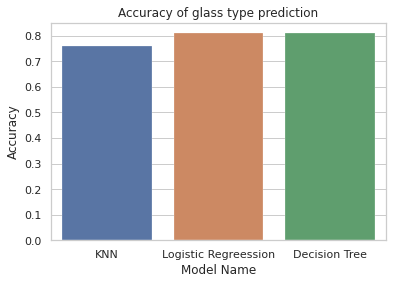

In [16]:
#Comparing The performance between Logistic Regression and Decision Teee using Bar chart

import seaborn as sns
models = ["KNN", "Logistic Regreession", "Decision Tree"]
accuracy = [knn_score,logistic_accuracy, decision_accuracy]
sns.set_theme(style="whitegrid")
axes = sns.barplot(x=models,y=accuracy, linewidth=0.25)
axes.set_title("Accuracy of glass type prediction")
axes.set_xlabel("Model Name")
axes.set_ylabel("Accuracy")